<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.859 · Visualización de datos</p>
<p style="margin: 0; text-align:right;">2022-1 · Máster universitario en Ciencia de datos (<i>Data science</i>)</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

<div class="alert alert-block alert-info">
    <strong>Nombre y apellidos:</strong> Juan Luis González Rodríguez
</div>

# PEC 2 - Nightingale rose

En primer lugar se cargan las librerias necesarias para procesar el dataset original y para imprimir el gráfico

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import ticker
import numpy as np
from IPython.display import display

A continuación cargamos el df usando la librería `Pandas`. Se elimina el campo relativo a *Pais* ya que se va a considerar los casos en todo el mundo. Se estudiarán los casos detectados y las muertes producidas por ébola en el año 2015 mes a mes. El <a href="https://www.kaggle.com/datasets/imdevskp/ebola-outbreak-20142016-complete-dataset?select=ebola_2014_2016_clean.csv/">dataset original</a> contiene los datos del ébola a nivel mundial entre 2014 y 2016.

In [2]:
# Se carga el csv
df = pd.read_csv('./dataset/ebola_2014_2016_clean.csv')
# Se elimina el campo relativo al país
df = df.drop(["Country"], axis=1)
# Se muestran las primeras filas
df.head()

,Date,"Cumulative no. of confirmed, probable and suspected cases","Cumulative no. of confirmed, probable and suspected deaths"
0,2014-08-29,648.0,430.0
1,2014-08-29,19.0,7.0
2,2014-08-29,1026.0,422.0
3,2014-08-29,1378.0,694.0
4,2014-09-05,1261.0,491.0


Se procesa el campo *Date*, actualmente es una cadena. Se convierte el tipo de datos que almacena en *DateTime*. Posterirmente se crea una columna en la que almacenamos el años y otra para el mes, extraidas de la columna original *Date*.

In [3]:
# Se convierte date a datatime y se extrae el mes y el año
df["Date"]=pd.to_datetime(df["Date"])
df["Year"] = pd.DatetimeIndex(df['Date']).year
df["Month"] = pd.DatetimeIndex(df['Date']).month

# Se elimina la columna original de fecha
df = df.drop(columns="Date")

# Se muestran las primeras filas
df.head()

,"Cumulative no. of confirmed, probable and suspected cases","Cumulative no. of confirmed, probable and suspected deaths",Year,Month
0,648.0,430.0,2014,8
1,19.0,7.0,2014,8
2,1026.0,422.0,2014,8
3,1378.0,694.0,2014,8
4,1261.0,491.0,2014,9


Se renombran las columnas y se ordenan para que sea más fácil trabajar con ellas.

In [4]:
df.columns = ["Cases", "Deaths", "Year", "Month"]
df = df[["Year", "Month", "Cases", "Deaths"]]

# Se muestran los cambios
df.head()

,Year,Month,Cases,Deaths
0,2014,8,648.0,430.0
1,2014,8,19.0,7.0
2,2014,8,1026.0,422.0
3,2014,8,1378.0,694.0
4,2014,9,1261.0,491.0


Por último, se filtran datos, se estudiará el total de casos detectados y de muerte producidas en 2015. Por lo que se eliminan los registros que no pertenencen a 2015, posteriormente se agrupan el recuento de los casos y el de las muertes mes a mes.

In [5]:
df = df[df["Year"] == 2015].groupby(["Year", "Month"]).sum()
display(df)

Cases    Deaths
Year Month                    
2015 1      450228.0  178640.0
     2      415694.0  167259.0
     3      416923.0  171715.0
     4      388932.0  161191.0
     5      563297.0  232726.0
     6      601666.0  246198.0
     7      637051.0  259330.0
     8      587825.0  237290.0
     9      621704.0  248770.0
     10     484586.0  192312.0
     11     314925.0  124454.0
     12     343652.0  135779.0

A continuación se transforman los datos para imprimir el gráfico `Nightingale Rose`.

In [6]:
# Se convierten a listas el número de casos detectados y de muertes
casos = list(df["Cases"])
muertes = list(df["Deaths"])

# Se crea una lista con la abreviación de los meses
meses = ["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"]

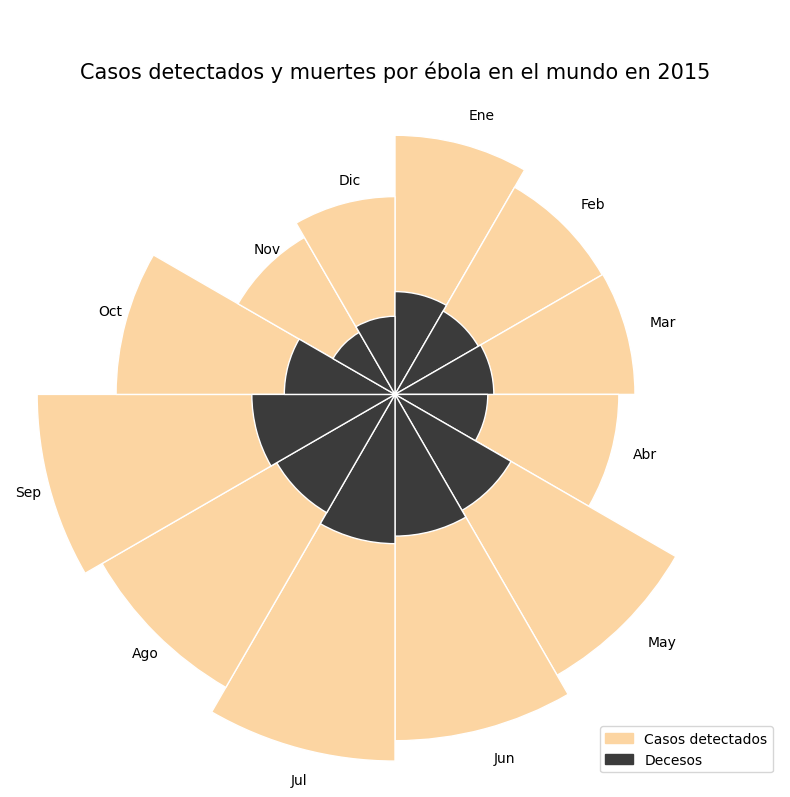

In [7]:
# Se calcula en cuantos segmentos se va a dividir el círculo.
segments = len(df)

# Las x irán desde 0 hasta 2 pi (circulo completo)
x_max = 2*np.pi

# Se calculan las 12 coordenadas de las "barras" en el círculo y su ancho.
x_coords = np.linspace(0, x_max, segments, endpoint=False)
width = x_max / segments

# Se hace el plot
plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)
ax.set_theta_direction(-1)
ax.set_theta_offset(5*np.pi/12)

# Se imprimen las áreas relativas al número de casos
ax.bar(
    x_coords,
    casos,
    width=width,
    color="#fcd5a2",
    edgecolor="white",
    linewidth=1
)

# Se imprimen las áreas relativas al número de muertes
ax.bar(
    x_coords,
    muertes,
    width=width,
    color="#3b3b3b",
    edgecolor="white",
    linewidth=1
)

# Se imprimen las etiquetas de los meses
for m in range(len(meses)):
    ax.text(
        x_coords[m],
        casos[m]*1.1,
        meses[m]
    )

# Se imprime la leyenda que identifica los colores
c_patch = mpatches.Patch(color='#fcd5a2', label='Casos detectados')
d_patch = mpatches.Patch(color='#3b3b3b', label='Decesos')
plt.legend(handles=[c_patch, d_patch], loc='lower right')

# Se da formato
plt.axis("off")
plt.title("Casos detectados y muertes por ébola en el mundo en 2015", {'fontsize':15}, y = 0.9)

plt.show()